In [161]:
import numpy as np
import matplotlib.pyplot as plt
import optical_cond
import my_my_maxent as maxent
import sys
sys.path.append('/oak/stanford/orgs/simes/rebjin/dqmc-dev/util')
import maxent
import util

import importlib
import os
import pandas as pd

import scienceplots
plt.style.use(['science','no-latex'])
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg") 

default_figsize = plt.rcParams['figure.figsize']
print("Default figsize:", default_figsize)
plt.rcParams['lines.markersize'] = 1

Default figsize: [3.5, 2.625]


/tmp/ipykernel_29730/4010542616.py:17: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("svg")


In [163]:
### Standardize filepaths for U
U = 6
parent_dir = '/oak/stanford/orgs/simes/rebjin/nflux1_n0.9/'

row_list = []
for subdir, dirs, files in os.walk(parent_dir):
    if f'U{U}' in subdir and '/.ipynb_checkpoints' not in subdir:
        # Get path
        path = subdir+'/'
        
        # Get params
        Ny, Nx, beta, L, tp = util.load_firstfile(
            path, "metadata/Nx", "metadata/Ny", "metadata/beta", "params/L", "metadata/t'"
        )

        # Add to dict for df
        dict = {
            'path': path,
            'U': U,
            'beta': np.round(beta, 6), 
            'Ny': Ny,
            'Nx': Nx,
            'L': L,
            'tp': tp
        }
        row_list.append(dict)
        
params_df = pd.DataFrame(row_list)
params_df = params_df.sort_values(by=['beta'], ascending = False)
params_df = params_df.reset_index(drop=True)
pd.set_option('display.width', 2000)
print(params_df)

### Look through repeats (ok this was just a mistake of copying lol no more repeats)

                                                path  U   beta Ny Nx   L tp
0  /oak/stanford/orgs/simes/rebjin/nflux1_n0.9/be...  6  3.000  8  8  30  0
1  /oak/stanford/orgs/simes/rebjin/nflux1_n0.9/be...  6  2.000  8  8  20  0
2  /oak/stanford/orgs/simes/rebjin/nflux1_n0.9/be...  6  1.500  8  8  15  0
3  /oak/stanford/orgs/simes/rebjin/nflux1_n0.9/be...  6  1.250  8  8  20  0
4  /oak/stanford/orgs/simes/rebjin/nflux1_n0.9/be...  6  1.000  8  8  10  0
5  /oak/stanford/orgs/simes/rebjin/nflux1_n0.9/be...  6  0.700  8  8  10  0
6  /oak/stanford/orgs/simes/rebjin/nflux1_n0.9/be...  6  0.500  8  8  10  0
7  /oak/stanford/orgs/simes/rebjin/nflux1_n0.9/be...  6  0.250  8  8  10  0
8  /oak/stanford/orgs/simes/rebjin/nflux1_n0.9/be...  6  0.125  8  8  10  0


/oak/stanford/orgs/simes/rebjin/nflux1_n0.9/beta2_U6_mu-1.239/
MaxEnt for sigma_xx
Alpha:  1.26e+03
MaxEnt for sigmas_sum


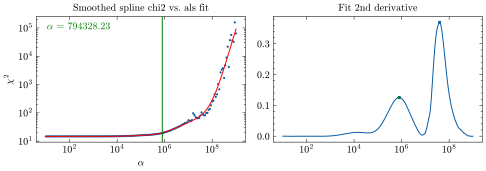

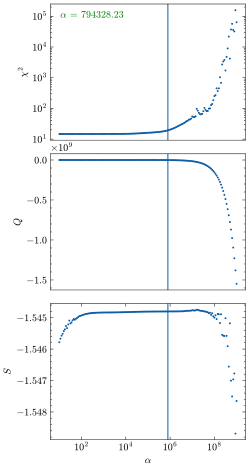

Alpha:  7.94e+05


In [170]:
##### Test for one value beta (symmetrized MaxEnt, modified Bryan's)
importlib.reload(maxent)
importlib.reload(optical_cond)

# Get path (from cleaned up params_df)
parent_dir = '/oak/stanford/orgs/simes/rebjin/nflux1_n0.9/'
beta = 2
path = params_df[params_df['beta']== beta]['path'].item()
print(path)

### Define ws
num_w = 300
ws, dws = maxent.gen_grid(num_w, -2.1, 2.1, lambda x: 0.4 * np.sinh(2.5 * x))
w_lim = np.max(ws)

### Get sigmas
re_sigmas_xx, re_sigmas_xy, im_sigmas_xy, sigmas_sum = optical_cond.get_sigmas(
    path, ws, dws,
    get_xy=True,
    opt_method=['Bryan', 'cvxpy']
)

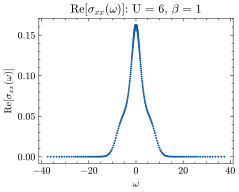

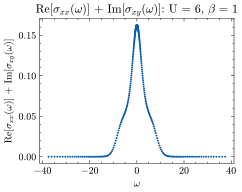

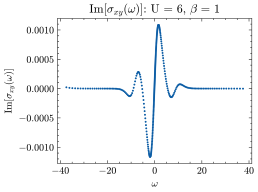

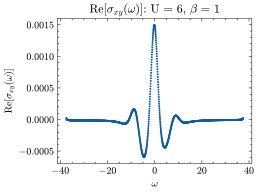

In [123]:
### Plot results
importlib.reload(optical_cond)
importlib.reload(maxent)

xs = np.linspace(-w_lim, w_lim, 1500)
optical_cond.plot_sigmas(ws, re_sigmas_xx, U, beta, "re_sigmas_xx", yerr = None)
optical_cond.plot_sigmas(ws, sigmas_sum, U, beta, "sigmas_sum", yerr = None)
optical_cond.plot_sigmas(ws, im_sigmas_xy, U, beta, "im_sigmas_xy", yerr = None)
optical_cond.plot_sigmas(xs, re_sigmas_xy, U, beta, "re_sigmas_xy", yerr = None)

In [159]:
# Try bootstrapping
importlib.reload(maxent)
importlib.reload(optical_cond)

# Get path (from cleaned up params_df)
parent_dir = '/oak/stanford/orgs/simes/rebjin/nflux1_n0.9/'
beta = 3
path = params_df[params_df['beta']== beta]['path'].item()
print(path)

### Define ws
num_w = 300
ws, dws = maxent.gen_grid(num_w, -2.1, 2.1, lambda x: 0.4 * np.sinh(2.5 * x))
w_lim = np.max(ws)

re_sigmas_xx_bs, re_sigmas_xy_bs, im_sigmas_xy_bs = optical_cond.get_sigmas(
    path, ws, dws,
    get_xy=True,
    bs=20,
    opt_method=['Bryan', 'Bryan']
)

/oak/stanford/orgs/simes/rebjin/nflux1_n0.9/beta3_U6_mu-1.275/
MaxEnt for sigma_xx
MaxEnt for sigmas_sum
Bs 0 ------------
Alpha:  3.55e+03
Alpha:  4.47e+03
Bs 1 ------------
Alpha:  6.31e+03
Alpha:  3.98e+03
Bs 2 ------------
Alpha:  2.51e+03
Alpha:  3.16e+03
Bs 3 ------------
Alpha:  2.51e+02
Alpha:  4.47e+02
Bs 4 ------------
Alpha:  3.16e+03
Alpha:  5.01e+03
Bs 5 ------------
Alpha:  2.24e+03
Alpha:  1.78e+03
Bs 6 ------------
Alpha:  4.47e+03
Alpha:  1.78e+03
Bs 7 ------------
Alpha:  2.82e+03
Alpha:  4.47e+03
Bs 8 ------------
Alpha:  3.55e+03
Alpha:  3.16e+03
Bs 9 ------------
Alpha:  5.01e+03
Alpha:  3.98e+03
Bs 10 ------------
Alpha:  3.55e+03
Alpha:  3.98e+03
Bs 11 ------------
Alpha:  2.00e+03
Alpha:  2.51e+03
Bs 12 ------------
Alpha:  2.82e+03
Alpha:  5.62e+03
Bs 13 ------------
Alpha:  2.51e+03
Alpha:  1.78e+03
Bs 14 ------------
Alpha:  2.51e+03
Alpha:  2.00e+03
Bs 15 ------------
Alpha:  3.98e+03
Alpha:  3.55e+03
Bs 16 ------------
Alpha:  2.82e+03
Alpha:  1.12e+03
Bs 1

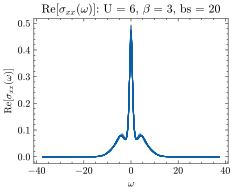

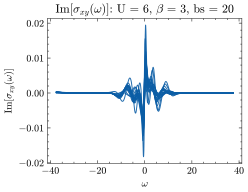

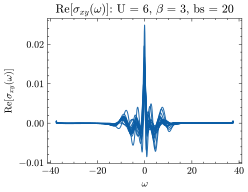

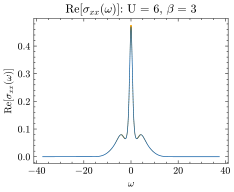

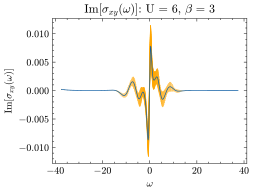

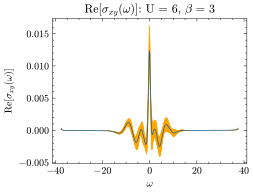

In [160]:
# Plot bootstrapped results
importlib.reload(optical_cond)
importlib.reload(maxent)

xs = np.linspace(-w_lim, w_lim, 1500)
optical_cond.plot_sigmas_bs(ws, re_sigmas_xx_bs, U, beta, "re_sigmas_xx", yerr = None)
optical_cond.plot_sigmas_bs(ws, im_sigmas_xy_bs, U, beta, "im_sigmas_xy", yerr = None)
optical_cond.plot_sigmas_bs(xs, re_sigmas_xy_bs, U, beta, "re_sigmas_xy", yerr = None)

# Plot bootstrap averages too I guess lmfao
xs = np.linspace(-w_lim, w_lim, 1500)
optical_cond.plot_sigmas(ws, np.mean(re_sigmas_xx_bs, axis=0), U, beta, "re_sigmas_xx", yerr = np.std(re_sigmas_xx_bs, axis=0))
optical_cond.plot_sigmas(ws, np.mean(im_sigmas_xy_bs, axis=0), U, beta, "im_sigmas_xy", yerr = np.std(im_sigmas_xy_bs, axis=0))
optical_cond.plot_sigmas(xs, np.mean(re_sigmas_xy_bs, axis=0), U, beta, "re_sigmas_xy", yerr = np.std(re_sigmas_xy_bs, axis=0))

# Old

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.interpolate import make_smoothing_spline
# import scipy
import h5py
import git
import sympy
import math
# other imports
import sys
sys.path.append('/oak/stanford/orgs/simes/rebjin/dqmc-dev/util')
import maxent
import util
import info
import os
import seaborn as sns
import pandas as pd
import cvxpy as cp
# import re
import scienceplots
from tqdm import tqdm
plt.style.use(['science','no-latex'])
plt.rcParams["figure.dpi"] = 150
plt.rcParams.update({'font.size': 13, 'axes.titlesize':18, 'axes.labelsize':16})

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

/tmp/ipykernel_20270/1086214811.py:28: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [14]:
def find_nearest(array, value, get_idx = False):
    diff_arr = array - value
    if array.ndim == 1:
        diff_mag_arr = np.abs(diff_arr)
    else:
        diff_mag_arr = np.linalg.norm(diff_arr, axis=-1)
    idx = (diff_mag_arr).argmin()
    diff = value - array[idx]
    if get_idx:
        return idx
    else:
        return array[idx]



In [9]:
### Self-written general solver functions
def Bryan(f, x_init, grad_func, hess_func, f_params=[], params=[], config={}):
    '''Newton's optimization with Levenberg-Marquardt parameter and iterative stopping condition (from Edwin's code).'''
    # assume the extra params are all the same?
    config_default = {
        'mu_multiplier': 2.0,  # increase/decrease mu by multiplying/dividing by this
        'mu_init': 1,
        'mu_min': 1,   # range of nonzero mu
        'mu_max': 1e100,
        'step_max_accept': 0.5,  # maximum size of an accepted step
        'step_drop_mu': 0.125,  # decrease mu if step_size < this
        'df_threshold': 1e-9,
        'max_small_df': 7,  # stop if dQ/Q < dQ_threshold this many times in a row
        'max_iter': 1000  # max num of iterations if above condition not met
    }
    config = {**config_default, **config}
    mu_multiplier, mu_init, mu_min, mu_max, step_max_accept, step_drop_mu, df_threshold, max_small_df, max_iter = config['mu_multiplier'], config['mu_init'], config['mu_min'], config['mu_max'], config['step_max_accept'], config['step_drop_mu'], config['df_threshold'], config['max_small_df'], config['max_iter']
    ########################
    ### literally this is only here bc of definition of step size, fix later
    G, W, K, m, al, precalc = params
    U, SigmaVT, M = precalc
    ########################
    ### Initialize
    x = x_init
    mu = mu_init
    f_old = f(x, *f_params)
    ### Begin search
    small_df = 0
    for i in range(max_iter):
        grad = grad_func(x, *f_params)
        hess = hess_func(x, *f_params)
        dx = np.linalg.solve(hess-mu*np.identity(x.shape[0]), -grad)   # sign of mu term may need to change
        ########################
        A = m*np.exp(U@x[:M.shape[0]])
        T = (U.T * A)@U # fix later
        step_size = dx[:M.shape[0]]@(T@dx[:M.shape[0]])    
        ######################## the only issue here is T, just to move on going to define this explicitly but come back and fix
        f_new = f(x+dx, *f_params)
        f_ratio = f_new/f_old
        # print("step size:", step_size)
        if step_size < step_max_accept and f_ratio < 1000:
            x += dx
            f_old = f_new
            if np.abs(f_ratio - 1.0) < df_threshold:
                small_df += 1
                if small_df == max_small_df:
                    # print(f'Exiting at {i} iterations.')
                    break
            else:
                small_df = 0
            if step_size < step_drop_mu:
                mu = mu/mu_multiplier if mu > mu_min else 0.0
        else:
            mu = np.clip(mu*mu_multiplier, mu_min, mu_max)
    else:
        print(f"Reached max iterations {max_iter} :(")
    return x
    
def Newton_unconstr(f, x_init, grad_func, hess_func, params=[], config={}):
    '''Newton's (damped) method for unconstrained optimization (following Boyd and Vandenberghe)'''
    config_default = {
        'epsilon': 1e-10,
        'max_iter': 2000,  # max num of iterations if above condition not met
        'alpha': 0.1, # backtracking line search constants, idk what to make these either other than in range, (0, 1)
        'beta': 0.5 # usually called alpha but obv I can't do that, (0, 0.5) (also not the same as MaxEnt alpha)
    }
    config = {**config_default, **config}
    epsilon, max_iter, alpha, beta = config['epsilon'], config['max_iter'], config['alpha'], config['beta']

    ### Initialize
    x = x_init
    # x = np.zeros(x_init.shape[0])
    f_old = f(x, *params)
    ### Begin search
    for i in range(max_iter):
        # Calculate Newton's step direction
        grad = grad_func(x, *params)
        hess = hess_func(x, *params)
        dx = np.linalg.solve(hess, -grad)
        # Calculate Newton's decrement (used for stopping criterion)
        lambda2 = grad@dx # should be always positive (we want to move in the general direction of the gradient), provided grad is defined with the correct sign
        # print("Decrement: ", lambda2)
        #################################### questionable part: should always be >0 due to positive definiteness of H
        lambda2 = np.abs(lambda2)   # but seems to work when I do this so idk lol, also jk 
        ####################################
        # Check stopping criterion
        if lambda2/2.0 < epsilon:
            print(f"Stopping at iter {i}.")
            break
        # ok last update - it literally works without backtracking so yeah figure this out
        t = 1
        # Update and continue
        x = x + t*dx
    else:
        print(f"Reached max iterations {max_iter} :(")
    return x

In [7]:
def Q_u(u, G, W, K, m, al, precalc, return_all=False):
    # precalc not actually necessary but just for simplifying for now
    U, SigmaVT, M = precalc
    A = m*np.exp(U@u)
    S = (A - m - scipy.special.xlogy(A, A/m)).sum()
    KAG = K@A - G
    chi2 = np.dot(KAG*KAG, W)
    if return_all:
        return al*S - 0.5*chi2, S, chi2
    return (al*S - 0.5*chi2)

def Q(A, G, W, K, m, al, return_all=False):
    S = (A - m - scipy.special.xlogy(A, A/m)).sum()
    KAG = K@A - G
    chi2 = np.dot(KAG*KAG, W)
    if return_all:
        return al*S - 0.5*chi2, S, chi2
    return (al*S - 0.5*chi2)

### Functions for gradient and Hessian (used in all optimization methods)
def grad_Q(u, G, W, K, m, al, precalc):
    '''Gradient of Q w.r.t. u = alpha u + g'''
    U, SigmaVT, M = precalc
    A = m*np.exp(U@u)
    return -(al*u + SigmaVT@((K@A-G)*W))
def hess_Q(u, G, W, K, m, al, precalc):
    '''Hessian of Q w.r.t. u = alpha I + MT'''
    U, SigmaVT, M = precalc
    s = u.shape[0]
    A = m*np.exp(U@u)
    T = np.dot(U.T * A, U)   # changes with u
    return -((al)*np.identity(s) + M@T)   ###### sign thing

In [ ]:
# function graveyard
def Newton_linear_constr(f, x_init, grad_func, hess_func, B, b, params=[], config={}):
    '''Newton's method for linear constrained optimization (following Boyd and Vandenberghe).
        
        Constraints take the linear form Bx = b. Assuming feasible start for now. Does not work lmao.
    '''
    
    config_default = {
        'epsilon': 1e-10,
        'max_iter': 1000,  # max num of iterations if above condition not met
        'alpha': 0.01, # backtracking line search constants, idk what to make these either other than in range, (0, 1)
        'beta': 0.5 # usually called alpha but obv I can't do that, (0, 0.5) (also not the same as MaxEnt alpha)
    }
    config = {**config_default, **config}
    epsilon, max_iter, alpha, beta = config['epsilon'], config['max_iter'], config['alpha'], config['beta']

    ### Initialize
    x = x_init
    x = np.zeros(x_init.shape[0])
    f_old = f(x, *params)
    ### Begin search
    for i in range(max_iter):
        # Calculate Newton's step direction
        grad = grad_func(x, *params)
        hess = hess_func(x, *params)

        lhs = np.vstack((hess, B))
        lhs = np.hstack((lhs, np.vstack((B.T, np.zeros((b.shape[0], b.shape[0]))))))
        rhs = np.append(-grad, -(B@x-b))
        dx = np.linalg.solve(lhs, rhs)[:x.shape[0]]
        # print(dx)
        # Calculate Newton's decrement (used for stopping criterion)
        lambda2 = grad@dx # should be always positive (we want to move in the general direction of the gradient), provided grad is defined with the correct sign
        print("Decrement: ", lambda2)
        #################################### but yeah it doesn't lol
        # lambda2 = np.abs(lambda2)   # but seems to work when I do this so idk lol, also jk 
        ####################################
        # Check stopping criterion
        if np.abs(lambda2)/2.0 < epsilon:
            print(f"Stopping at iter {i}.")
            break
        # Calculate step size (backtracking line search)
        # ok last update - it literally works without backtracking so yeah figure this out
        t = 1
        if np.abs(lambda2) < 1000:
            while f(x+t*dx, *params) > f(x, *params) + alpha*t*(lambda2):
                t = beta*t
        # print('f(x): ', f(x, *params))
        # print('f(x+t dx): ',  f(x+ t*dx, *params))
        # print('f(x+t dx): ',  f(x, *params) + alpha*t*(lambda2))
        # while f(x+t*dx, *params) < f(x, *params) + alpha*t*(lambda2):
        #     t = beta*t
        print("Step size: ", t)
        # Update and continue
        x = x + t*dx
    else:
        print(f"Reached max iterations {max_iter} :(")
    return x

### Old stuff
def calc_A_old(G, K, m, A_xx=None, opt_method='Bryan', als=np.logspace(9, 1, 1+20*(9-1))):
    nbin = G.shape[0]
    Gavg = G.mean(0)

    ### Change to basis in which C is diagonal (apparently makes calculating chi^2 easier?)
    # First find the change of basis matrix
    sigma, Uc = np.linalg.eigh(np.cov(G.T) / nbin)
    Uc = Uc.T
    W = 1.0/sigma
    # Recommended step: check C eigenvalues, too small (W too big) "might make optimizing Q[A] difficult"
    # Set values of W above W_cap to W_cap
    W_ratio_max = 1e8
    W_cap = W_ratio_max*W.min()
    n_large = np.sum(W.max() > W_cap)
    if W.max() > W_cap:
        print(f"clipping {n_large} W values to W.min()*{W_ratio_max}")
        W[W > W_cap] = W_cap
    # Change K and G to this basis (Kp, Gp) using Uc
    Kp = np.dot(Uc, K)
    Gavgp = np.dot(Uc, Gavg)

    ### Precalculate some matrices from SVD stuff on the kernel (used in Bryan's optimization)
    svd_threshold = 1e-12   # consider singular values less than threshold 0
    V, Sigma, U = np.linalg.svd(Kp, False)
    mask = (Sigma/Sigma.max() >= svd_threshold) # drop singular values less than threshold
    U = U.T[:, mask]
    SigmaVT = (V[:, mask] * Sigma[mask]).T
    M = np.dot(SigmaVT * W, SigmaVT.T)
    precalc = (U, SigmaVT, M)

    # useful constants
    N = K.shape[1]
    s = M.shape[0]

    ### Functions for gradient and Hessian (used in all optimization methods)
    def grad_Q(u, G, W, K, m, al, precalc):
        '''Gradient of Q w.r.t. u = alpha u + g'''
        U, SigmaVT, M = precalc
        A = m*np.exp(U@u)
        return -(al*u + SigmaVT@((K@A-G)*W))
    def hess_Q(u, G, W, K, m, al, precalc):
        '''Hessian of Q w.r.t. u = alpha I + MT'''
        U, SigmaVT, M = precalc
        s = u.shape[0]
        A = m*np.exp(U@u)
        T = np.dot(U.T * A, U)   # changes with u
        return -((al)*np.identity(s) + M@T)   ###### sign thing

    ### Calculate A(alpha) over predefined range of alphas (used to determine single optimum value of alpha)
    As = np.zeros((als.shape[0], Kp.shape[1]))
    us = np.zeros((als.shape[0], M.shape[0]))
    chi2s = np.zeros_like(als)
    Qs = np.zeros_like(als)
    Ss = np.zeros_like(als)
    for i, al in enumerate(als):
        # As[i], us[i], chi2s[i], Qs[i], Ss[i] = maxent.calc_A_al(Gavgp, W, Kp, m, al, precalc, us[i-1])
        # print(al)
        params = [Gavgp, W, Kp, m, al, precalc]
        u_init = us[i-1]
        config = {'mu_min': al/4.0, 'mu_max': al*1e100, 'mu_init': al}
        us[i] = Bryan(Q_u, u_init, grad_Q, hess_Q, f_params=params, params=params, config=config)
        As[i] = m*np.exp(U@us[i])
        Qs[i], Ss[i], chi2s[i] = Q_u(us[i], *params, return_all=True)

    ### Select optimal alpha based on log-log plot of chi^2(A(alpha)) vs. alpha (BT)
    order = als.argsort()
    fit = CubicSpline(np.log(als[order]), np.log(chi2s[order]))
    k = fit(np.log(als), 2)/(1 + fit(np.log(als), 1)**2)**1.5
    i = k.argmax()
    al = als[i]
    print("Optimal alpha: ", al, i)

    ### Get final spectrum for selected alpha
    if opt_method == 'newton_unconstr':
        # A = As[i]
        print('Doing Newton_unconstr:')
        params = [Gavgp, W, Kp, m, al, precalc]
        u_init = us[i]
        u = Newton_unconstr(Q_u, u_init, grad_Q, hess_Q, params)
        A = m*np.exp(U@u)
    elif opt_method == 'linear_symm':
        print('Doing Newton_linear_constr:')
            
        params = [Gavgp, W, Kp, m, al, precalc]

        # Define constraint vector of the form Bx=b
        # Define constraint vector function
        def h(u):    
            return B_indep@u-b_indep
        def jac_h(u):
            return B_indep
            # return np.array([U[w0_idx+i]+U[w0_idx-(i+1)] for i in range(N//2)]) # list of gradients of constraint functions (here, they're constant not )
        w0_idx = N//2
        
        b = 2*np.log(A_xx/m)[w0_idx:]
        B = np.zeros((N//2, s))
        for i in range(N//2):
            B[i] = U[w0_idx+i]+U[w0_idx-(i+1)]
        # Reduce # of rows of B to the rank of B (too many constraints as is, not linearly independent)
        B_full = np.hstack((B, b[:, None]))   # Augmented matrix
        B_full_indep = scipy.linalg.orth(B_full.T).T # New matrix with linearly independent rows
        B_indep = B_full_indep[:, :-1]
        b_indep = B_full_indep[:, -1]

        c = len(h(us[i]))
        x_init = np.append(us[i], np.zeros(c))
        u_init = x_init[:s]
        print("Number of constraints: ", c)
        
        c = len(h(u_init)) # number of constraints
        
        # Define Lagrangian and derivatives (found by hand)
        def lagrangian(x):
            u, lam = x[:s], x[s:]   # x is combo vector with them both
            return Q_u(u, *params) + lam@h(u)
        def grad_lagrangian(x):
            u, lam = x[:s], x[s:]
            return np.append(grad_Q(u, *params), np.zeros(c)) + np.append(jac_h(u).T@lam, np.zeros(c)) + np.append(np.zeros(s), h(u))
        def hess_lagrangian(x):
            u, lam = x[:s], x[s:]
            H = np.vstack((hess_Q(u, *params), jac_h(u)))   # possibly need to transpose hess_Q if this doesn't work
            H = np.hstack((H, np.vstack((jac_h(u).T, np.zeros((c, c))))))
            return H

        # Actually try minimizing the square of the gradient of the lagrangian (but need expression for grad of square of grad)
        # Optimize w/ unconstrained method of choice
        # x_init = np.zeros(s+c)
        x = Newton_unconstr(lagrangian, x_init, grad_lagrangian, hess_lagrangian)
        # x = Bryan(lagrangian, x_init, grad_lagrangian, hess_lagrangian, params=params)
        u = x[:s]
        # u = Newton_linear_constr(Q_u, u_init, grad_Q, hess_Q, B, b, params)
        A = m*np.exp(U@u)
    elif opt_method == 'solver_constr':
        print("Using cvxpy")
        # try to get cvxpy to work for the unconstrained case, see how fast it is compared to the built in method
        A = cp.Variable(N)
        # al = al*10
        S = cp.multiply(al, cp.sum(A-m-cp.rel_entr(A, m)))
        chi2 = cp.square(Kp@(A)-Gavgp)@W
        objective = cp.Maximize(S - 0.5*chi2)
        
        # b = mult*2*A_xx[N//2:N//2+N//4]
        # B = np.hstack((np.flip(np.identity(N//2), axis=0), np.identity(N//2)))[:N//4]
        # constraints = [A>= 1e-9, B@A == b]
        b = 2*A_xx[N//2:]
        B = np.hstack((np.flip(np.identity(N//2), axis=0), np.identity(N//2)))
        constraints = [A>= 1e-10, B@A == b]
        
        prob = cp.Problem(objective, constraints)
        print("Optimal objective value", prob.solve(verbose=False, tol_feas = 1e-10))
        A = A.value
    else:
        # Bryan's method
        A = As[i]
        print("Bryan's method objective value", Q(A, Gavgp, W, Kp, m, al))
    
    plot_chi2=False
    if plot_chi2:
        xlim=(0, 10**6)
        fig, ax = plt.subplots(nrows=3, figsize=(5, 8))
        plot_list = [chi2s, Qs, Ss]
        plot_labels = [r"$\chi^2$", r"$Q$", r"$S$"]
        fig.subplots_adjust(hspace=0.1)
        for i in range(3):
            ax[i].scatter(als, plot_list[i])
            ax[i].set_xscale("log")
            ax[i].set_ylabel(plot_labels[i])
            ax[i].axvline(al)
            if i!=2:
                ax[i].set_xticks([])
        ax[0].set_yscale("log")
        ax[2].set_xlabel(r"$\alpha$")
        plt.show()

    return A

#### $\sigma_{xx}$ Test

In [40]:
# rq relook at what the h5 files look like again, what measurements there are
parent_dir = '/oak/stanford/orgs/simes/rebjin/nflux0_n0.9/'
path = parent_dir + 'beta0.125_U10_mu-2.317/batch_0.h5'   # choose a random test file

with h5py.File(path, "r") as f:
    print(list(f.keys()))
    print("Equal time measurements: ", list(f['meas_eqlt'].keys()))
    print("Unequal time measurements: ", list(f['meas_uneqlt'].keys()))

['meas_eqlt', 'meas_uneqlt', 'metadata', 'params', 'state']
Equal time measurements:  ['density', 'double_occ', 'g00', 'n_sample', 'nn', 'pair_sw', 'sign', 'xx', 'zz']
Unequal time measurements:  ['gt0', 'jj', 'jsjs', 'kk', 'ksks', 'n_sample', 'nn', 'pair_bb', 'pair_sw', 'sign', 'xx', 'zz']


In [140]:
def get_sigma_w(path, mdl, w, dw, bs=0):    
    ### get model params
    # path is a folder with a bunch of bins in it (a set of runs for one choice of U, beta, etc.)
    # tp is t', second neighbor hopping
    Ny, Nx, beta, L, tp = util.load_firstfile(
        path, "metadata/Nx", "metadata/Ny", "metadata/beta", "params/L", "metadata/t'"
    )
    
    ### load in measurements
    n_sample, sign, jj = util.load(
        path, "meas_uneqlt/n_sample", "meas_uneqlt/sign", "meas_uneqlt/jj"
    )
    taus = np.linspace(0, beta, L + 1)
    # sign and n_sample are just the usual 1D arrays of total sum measurements for each bin
    # 1st index of jj is still bin, but each measurement is initally outputed as a 1D array itself of a bunch of real #s
    
    # only keep measurements from bins where n_sample is max value
    mask = n_sample == n_sample.max()   
    sign, jj = sign[mask], jj[mask]
    nbin = mask.sum()
    
    ### reshape jj
    # jj is a 2x2 matrix (or 4x4, for nonzero t') discretized in tau + containing info from bond to bond (indexed by lattice site)
    # 1xt index of jj still bin
    jj.shape = -1, L, 2, 2, Ny, Nx
    jjq0 = jj.sum((-1, -2))   # sum over all the bonds (don't care about bond to bond info since q=0)

    # add up all the x current contributions (for each bin, so still bin + tau separated)
    jxjxq0 = -(
        jjq0[..., 0, 0]
        # + tp * jjq0[..., 0, 2]
        # - tp * jjq0[..., 0, 3]
        # + tp * jjq0[..., 2, 0]
        # + tp * tp * jjq0[..., 2, 2]
        # - tp * jjq0[..., 3, 0]
        # + tp * tp * jjq0[..., 3, 3]
    )
    # same for y current
    jyjyq0 = -(
        jjq0[..., 1, 1]
        # + tp * jjq0[..., 1, 2]
        # + tp * jjq0[..., 1, 3]
        # + tp * jjq0[..., 2, 1]
        # + tp * tp * jjq0[..., 2, 2]
        # + tp * jjq0[..., 3, 1]
        # + tp * tp * jjq0[..., 3, 3]
    )
    # average over xx and yy to get avg longitudinal current current data (improved statistics)
    chiq0 = 0.5 * (jxjxq0 + jyjyq0)   
    # correlation func looks like a symmetric dip in tau, symmetrizes the data (improved statistics again)
    chiq0 = 0.5 * (chiq0 + chiq0[:, -np.arange(L) % L])
    
    ### maxent
    chiq0 /= n_sample.max()   # shape of chiq0 is (60, 10): (bin, imaginary time)
    sign /= n_sample.max()   # get avg measurements for each bin
    # print(f"nbin={nbin}\t<sign>={sign.mean()}")

    # get the bosonic kernel
    krnl = maxent.kernel_b(beta, taus[0 : L // 2 + 1], w, sym=True)
    if mdl is None:
        # default flat model
        mdl = maxent.model_flat(dw)
        useBT = True  # useBT is just a choice of algorithm to pick alpha
    else:
        useBT = False
    
    # bs = bootstrapping
    if bs > 0:
        As = np.zeros((bs, len(w)))
        mdls = np.zeros((bs, len(w)))
        if mdl.shape == w.shape:
            mdl = np.broadcast_to(mdl, (bs, len(w)))
        for i in range(bs):
            resample = np.random.randint(0, nbin, nbin)   # 1D array of random ints nbin long
            f = chiq0[resample].mean(0)   # take a random resample with replacement of bins of imaginary time correlator
            chiq0w0 = CubicSpline(taus, np.append(f, f[0])).integrate(0, beta)  # just the definition
            g = 2 * chiq0[resample, : L // 2 + 1] / chiq0w0
            #             print(i)
            #             global gg, kk, mm
            #             gg, kk, mm = g, krnl, mdl
            A = maxent.calc_A(
                g, krnl, mdl[i] + np.nextafter(0, 1), plot=False, useBT=useBT
            )
            mdls[i] = A / A.sum()
            As[i] = A / dw * (chiq0w0 / sign[resample].mean()) * np.pi / 2
        return As, mdls   # As is now list of sigmas/measurements obtained for each resampling, get error from st. dev. of resampled measurements
    else:
        # no bootstrapping
        f = chiq0.mean(0)   # mean among bins, separated by tau, shape (10)
        chiq0w0 = CubicSpline(taus, np.append(f, f[0])).integrate(0, beta)  # G^O(i w_n = 0), used in def of G and A
        g = 2 * chiq0[:, : L // 2 + 1] / chiq0w0
    
        A = maxent.calc_A(g, krnl, mdl, plot=False, useBT=useBT)
        return A / dw * (chiq0w0 / sign.mean()) * np.pi / 2, A / A.sum()    # A multipled by extra constants, just detail of maxent implementation

In [38]:
### Make a plot for sigma_xx looping through all the temperatures
### include error for each point with bootstrapping

# Choose dir and U to plot from + sigma params
parent_dir = '/oak/stanford/orgs/simes/rebjin/nflux0_n0.9/'
U = 6
nw_sym = 80
w_sym, dw_sym = maxent.gen_grid(nw_sym, 0, 2.1, lambda x: 0.4 * np.sinh(2.5 * x))
num_bs = 50

# For choice of U, get sigma(w) for all betas
row_list = []
for subdir, dirs, files in os.walk(parent_dir):
    if f'U{U}' in subdir:
        # Get model params
        path = subdir+'/'
        Ny, Nx, beta, L, tp = util.load_firstfile(
            path, "metadata/Nx", "metadata/Ny", "metadata/beta", "params/L", "metadata/t'"
        )
        T = np.round(1/beta, 2)
        # print(f"Params:\nNy = {Ny}, Nx = {Nx}, beta = {beta}, L = {L}, tp = {tp}")
        print(f"Beta = {beta}")

        # Get sigmas
        sigmas, _ = get_sigma_w(path, None, w_sym, dw_sym, bs = 0)
        # Get errors with bootstrapping
        with HiddenPrints():
            sigmas_bs, _ = get_sigma_w(path, None, w_sym, dw_sym, bs = num_bs)
        sigmas_err = np.std(sigmas_bs, axis=0)
        
        # Add dict to row_list
        dict = {
            'beta': beta,
            'U': U, 
            'T': T,
            'sigmas': sigmas, 
            'sigmas_err': sigmas_err
        }
        row_list.append(dict)
    
# Make DataFrame from list of dicts
df = pd.DataFrame(row_list)
df = df.sort_values(by=['beta'], ascending = False)
df = df.reset_index(drop=True)
print(df)

Beta = 0.25
alpha=15848.932	chi2/dof=0.639	A.sum()=0.999998
Beta = 1.0
alpha=12589.254	chi2/dof=2.590	A.sum()=0.999546
Beta = 1.25
alpha=1778.279	chi2/dof=0.383	A.sum()=0.999942
Beta = 0.7000000000000001
alpha=89.125	chi2/dof=0.027	A.sum()=0.999905
Beta = 0.125
alpha=28183.829	chi2/dof=1.865	A.sum()=0.999994
Beta = 1.5
alpha=141.254	chi2/dof=0.117	A.sum()=0.999526
Beta = 2.0
alpha=501.187	chi2/dof=0.582	A.sum()=0.999527
Beta = 3.0
alpha=794.328	chi2/dof=0.447	A.sum()=0.999518
Beta = 0.5
alpha=63.096	chi2/dof=0.034	A.sum()=0.999980


KeyboardInterrupt: 

Text(0.5, 1.0, 'U = 6')

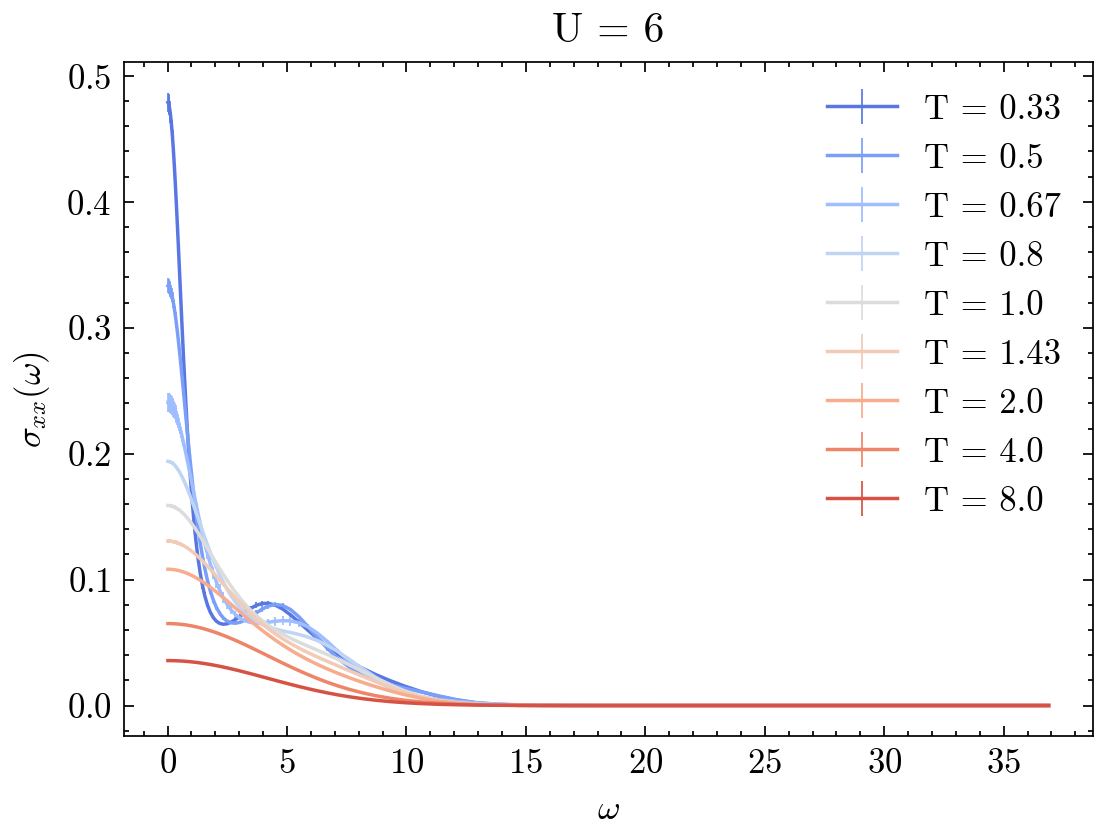

In [19]:
# Plot results
plt.rcParams["figure.dpi"] = 250
colors = sns.color_palette('coolwarm', df.shape[0])

plt.figure(figsize = (5, 3.5))
for ind in df.index:
    sigmas_err = df['sigmas_err'][ind]
    sigmas = df['sigmas'][ind]
    T = df['T'][ind]
    plt.errorbar(w_sym, sigmas, yerr = sigmas_err, label = f'T = {T}', color = colors[ind], elinewidth=0.5)

plt.legend()
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\sigma_{xx}(\omega)$')
plt.title(f'U = {U}')

# print(list(df[df['T']==8.00]['sigmas_err']))
# print(list(df[df['T']==0.67]['sigmas_err']))

[7.47751684e-03 5.88461516e-03 7.63051996e-03 1.41538781e-03
 1.42320296e-03 1.50616235e-03 8.90009520e-04 1.14202736e-04
 6.33378065e-05]
[0.03259832 0.05297338 0.13165236 0.03763392 0.05636096 0.08830198
 0.07595758 0.02697207 0.04976391]


<Figure size 875x656.25 with 0 Axes>

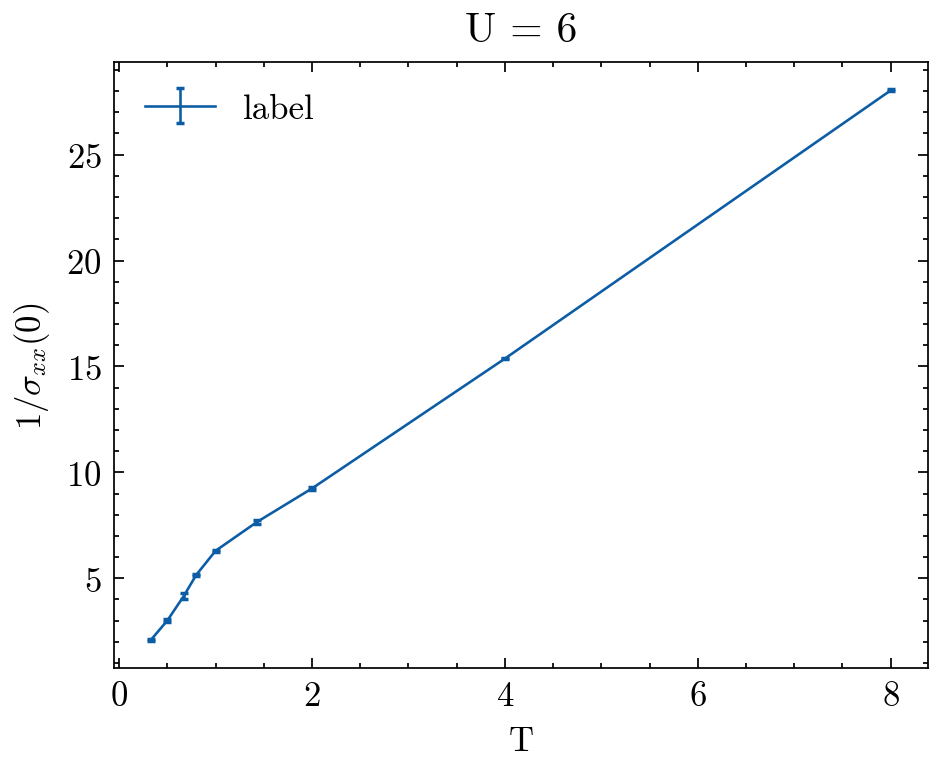

In [60]:
### Plot rho vs. T
sigmas_0 = np.array([sigmas[0] for sigmas in df['sigmas']])
sigmas_0_err = np.array([sigmas_err[0] for sigmas_err in df['sigmas_err']])
rhos_0 = 1/sigmas_0
rhos_0_err = (1/sigmas_0**2)*sigmas_0_err    # followed error formula for 1/x, idk
print(sigmas_0_err)
print(rhos_0_err)

fig, ax = plt.subplots(figsize = 1.2*plt.gcf().get_size_inches())
ax.errorbar(df['T'], rhos_0, yerr=rhos_0_err, fmt='s-', lw=0.75, ms=0, label='label', capsize=1.2)

ax.set_xlabel('T')
ax.set_ylabel('$1/\sigma_{xx} (0)$')
ax.set_title(f'U = {U}')
ax.legend()
# plt.savefig("newest_fig.png", dpi=200)

/oak/stanford/orgs/simes/rebjin/nflux0_n0.9/beta0.125_U6_mu-1.992/
alpha=28183.829	chi2/dof=1.865	A.sum()=0.999994
(100,)
[5.23493105e-05 5.23427218e-05 5.23294728e-05 5.23094198e-05
 5.22823453e-05 5.22479557e-05 5.22058786e-05 5.21556588e-05
 5.20967535e-05 5.20285272e-05 5.19502451e-05 5.18610657e-05
 5.17600328e-05 5.16460659e-05 5.15179497e-05 5.13743230e-05
 5.12136653e-05 5.10342836e-05 5.08342964e-05 5.06116178e-05
 5.03639394e-05 5.00887113e-05 4.97831219e-05 4.94440764e-05
 4.90681746e-05 4.86516880e-05 4.81905361e-05 4.76802635e-05
 4.71160166e-05 4.64925232e-05 4.58040730e-05 4.50445030e-05
 4.42071876e-05 4.32850359e-05 4.22704993e-05 4.11555910e-05
 3.99319224e-05 3.85907594e-05 3.71231050e-05 3.55198126e-05
 3.37717383e-05 3.18699386e-05 2.98059240e-05 2.75719769e-05
 2.51615455e-05 2.25697281e-05 1.97938635e-05 1.68342630e-05
 1.36951623e-05 1.03861892e-05 6.92587523e-06 3.36222782e-06
 9.48659922e-07 4.35677839e-06 8.16053001e-06 1.19658612e-05
 1.56903289e-05 1.925433

Text(0.5, 1.0, 'U = 6, $\\beta$ = 0.125')

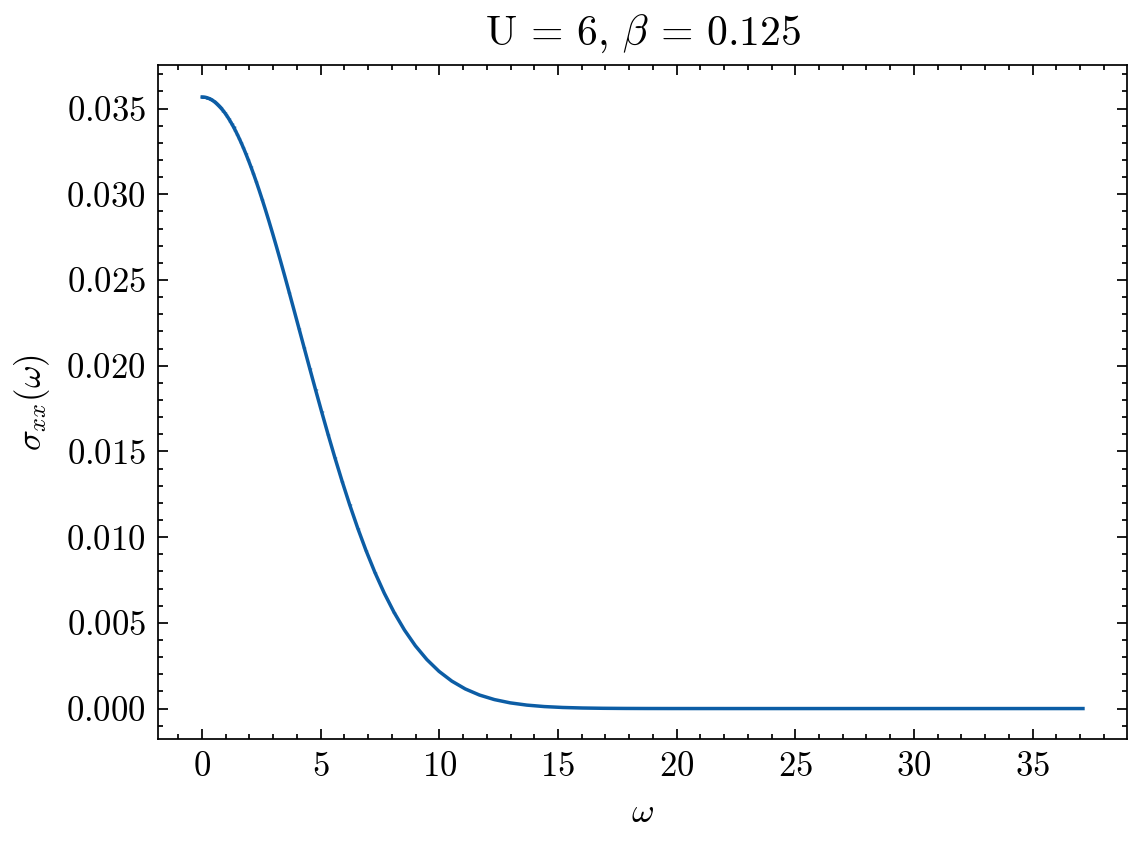

In [42]:
### Test sigma(w) plot for one U, beta
# include error bars with bootstrapping

parent_dir = '/oak/stanford/orgs/simes/rebjin/nflux0_n0.9/'
U = 6
beta = 0.125
# find filepath with specified U, beta
for subdir, dirs, files in os.walk(parent_dir):
    if f'U{U}' in subdir and f'beta{beta}' in subdir:
        path = subdir+'/'
print(path)

# Get sigmas
nw_sym = 100
w_sym, dw_sym = maxent.gen_grid(nw_sym, 0, 2.1, lambda x: 0.4 * np.sinh(2.5 * x))
sigmas, _ = get_sigma_w(path, None, w_sym, dw_sym)
print(sigmas.shape)
# Get error with bootstrapping
num_bs = 20
with HiddenPrints():
    bs_sigmas, _ = get_sigma_w(path, None, w_sym, dw_sym, bs=num_bs)   # first index bin, second index w
sigmas_err = np.std(bs_sigmas, axis=0)
print(sigmas_err)

plt.figure(figsize = (5, 3.5))
plt.errorbar(w_sym, sigmas, yerr=sigmas_err)
# plt.scatter(w_sym, sigmas, s = 1)
# plt.scatter(w_sym, sigmas[1], s = 1)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\sigma_{xx}(\omega)$')
plt.title(rf'U = {U}, $\beta$ = {beta}')

#### $\sigma_{xy}$ Test

In [4]:
### Standardize filepaths for U
U = 6
parent_dir = '/oak/stanford/orgs/simes/rebjin/nflux1_n0.9/'

row_list = []
for subdir, dirs, files in os.walk(parent_dir):
    if f'U{U}' in subdir and '/.ipynb_checkpoints' not in subdir:
        # Get path
        path = subdir+'/'
        
        # Get params
        Ny, Nx, beta, L, tp = util.load_firstfile(
            path, "metadata/Nx", "metadata/Ny", "metadata/beta", "params/L", "metadata/t'"
        )

        # Add to dict for df
        dict = {
            'path': path,
            'U': U,
            'beta': np.round(beta, 6), 
            'Ny': Ny,
            'Nx': Nx,
            'L': L,
            'tp': tp
        }
        row_list.append(dict)
        
params_df = pd.DataFrame(row_list)
params_df = params_df.sort_values(by=['beta'], ascending = False)
params_df = params_df.reset_index(drop=True)
pd.set_option('display.width', 2000)
print(params_df)

### Look through repeats (ok this was just a mistake of copying lol no more repeats)

                                                path  U   beta Ny Nx   L tp
0  /oak/stanford/orgs/simes/rebjin/nflux1_n0.9/be...  6  3.000  8  8  30  0
1  /oak/stanford/orgs/simes/rebjin/nflux1_n0.9/be...  6  2.000  8  8  20  0
2  /oak/stanford/orgs/simes/rebjin/nflux1_n0.9/be...  6  1.500  8  8  15  0
3  /oak/stanford/orgs/simes/rebjin/nflux1_n0.9/be...  6  1.250  8  8  20  0
4  /oak/stanford/orgs/simes/rebjin/nflux1_n0.9/be...  6  1.000  8  8  10  0
5  /oak/stanford/orgs/simes/rebjin/nflux1_n0.9/be...  6  0.700  8  8  10  0
6  /oak/stanford/orgs/simes/rebjin/nflux1_n0.9/be...  6  0.500  8  8  10  0
7  /oak/stanford/orgs/simes/rebjin/nflux1_n0.9/be...  6  0.250  8  8  10  0
8  /oak/stanford/orgs/simes/rebjin/nflux1_n0.9/be...  6  0.125  8  8  10  0


/oak/stanford/orgs/simes/rebjin/nflux1_n0.9/beta1_U6_mu-1.135/
MaxEnt for sigma_xx
Alpha:  794.3282347242805 122
MaxEnt for sigmas_sum


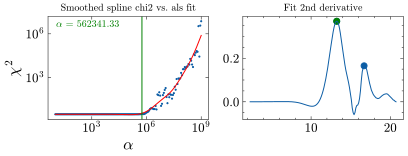

Alpha:  562341.3251903491 65


In [72]:
##### Test for one value beta (symmetrized MaxEnt, modified Bryan's)
# Get path (from cleaned up params_df)
parent_dir = '/oak/stanford/orgs/simes/rebjin/nflux1_n0.9/'
beta = 1
path = params_df[params_df['beta']== beta]['path'].item()
print(path)

### Define ws
num_w = 300
ws, dws = maxent.gen_grid(num_w, -2.1, 2.1, lambda x: 0.4 * np.sinh(2.5 * x))
# ws, dws = maxent.gen_grid(num_w, -1.9, 1.9, lambda x: 0.4 * np.sinh(2.5 * x))
w_lim = np.max(ws)

### Get sigmas
re_sigmas_xx, re_sigmas_xy, im_sigmas_xy, sigmas_sum = get_sigmas(
    path, ws, dws,
    get_xy=True,
    opt_method=['Bryan', 'cvx_constr']
)

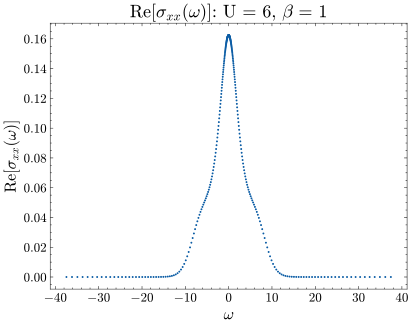

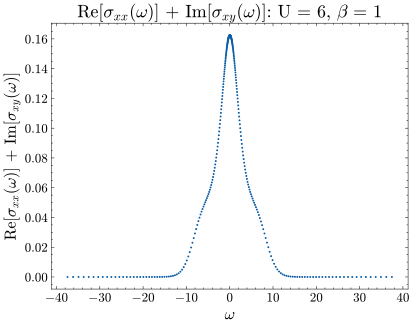

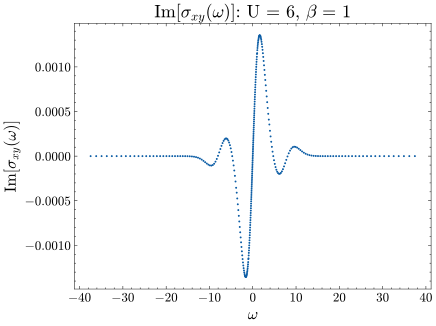

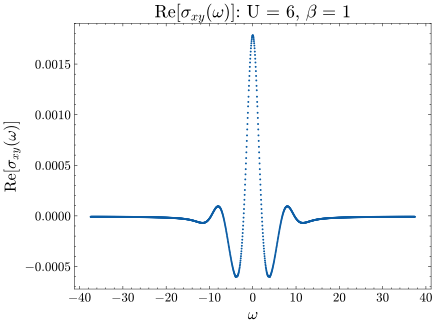

In [16]:
xs = np.linspace(-w_lim, w_lim, 1500)
plot_sigmas(ws, re_sigmas_xx, U, beta, "re_sigmas_xx", yerr = None)
plot_sigmas(ws, sigmas_sum, U, beta, "sigmas_sum", yerr = None)
plot_sigmas(ws, im_sigmas_xy, U, beta, "im_sigmas_xy", yerr = None)
plot_sigmas(xs, re_sigmas_xy, U, beta, "re_sigmas_xy", yerr = None)

Beta =  0.125
Unconstrained
MaxEnt for sigma_xx
Alpha:  28183.82931264455 91
MaxEnt for sigmas_sum
clipping 1 W values to W.min()*100000000.0
Alpha:  31622.776601683792 90

Constrained (cvxpy)
MaxEnt for sigma_xx
Alpha:  28183.82931264455 91
MaxEnt for sigmas_sum
clipping 1 W values to W.min()*100000000.0


/home/users/rebjin/.local/lib/python3.9/site-packages/cvxpy/problems/problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


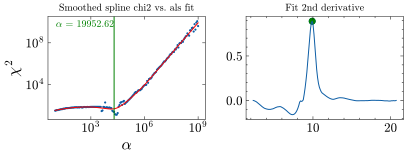

Alpha:  19952.62314968879 94
------------------------------------------------------------
Beta =  0.25
Unconstrained
MaxEnt for sigma_xx
Alpha:  25118.86431509577 92
MaxEnt for sigmas_sum
clipping 1 W values to W.min()*100000000.0
Alpha:  25118.86431509577 92

Constrained (cvxpy)
MaxEnt for sigma_xx
Alpha:  25118.86431509577 92
MaxEnt for sigmas_sum
clipping 1 W values to W.min()*100000000.0


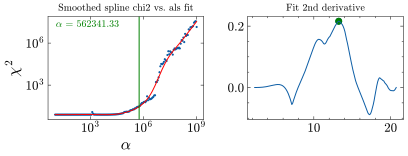

Alpha:  562341.3251903491 65
------------------------------------------------------------
Beta =  0.5
Unconstrained
MaxEnt for sigma_xx
Alpha:  891.2509381337441 121
MaxEnt for sigmas_sum
Alpha:  891.2509381337441 121

Constrained (cvxpy)
MaxEnt for sigma_xx
Alpha:  891.2509381337441 121
MaxEnt for sigmas_sum


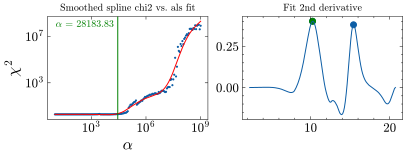

Alpha:  28183.82931264455 91
------------------------------------------------------------
Beta =  0.7
Unconstrained
MaxEnt for sigma_xx
Alpha:  1778.2794100389228 115
MaxEnt for sigmas_sum
Alpha:  1778.2794100389228 115

Constrained (cvxpy)
MaxEnt for sigma_xx
Alpha:  1778.2794100389228 115
MaxEnt for sigmas_sum


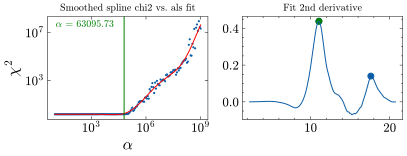

Alpha:  63095.7344480193 84
------------------------------------------------------------
Beta =  1
Unconstrained
MaxEnt for sigma_xx
Alpha:  794.3282347242805 122
MaxEnt for sigmas_sum
Alpha:  794.3282347242805 122

Constrained (cvxpy)
MaxEnt for sigma_xx
Alpha:  794.3282347242805 122
MaxEnt for sigmas_sum


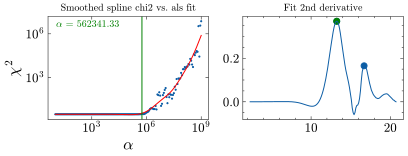

Alpha:  562341.3251903491 65
------------------------------------------------------------
    beta  U     T                                    re_sigmas_xx_uc                                    re_sigmas_xy_uc                                    im_sigmas_xy_uc                                      sigmas_sum_uc                                   re_sigmas_xx_cvx                                   re_sigmas_xy_cvx                                   im_sigmas_xy_cvx                                     sigmas_sum_cvx
0  1.000  6  1.00  [1.0825924691383682e-05, 7.351846477663104e-06...  [2.3800021502632614e-05, 8.597560187420745e-06...  [2.164554821007346e-05, 1.269197711749377e-05,...  [3.2471472901457144e-05, 2.0043823595156874e-0...  [1.0825924691383682e-05, 7.351846477663104e-06...  [-9.317556864550981e-06, -9.113030939424736e-0...  [-1.6101285761137247e-07, -3.874892956193699e-...  [1.066491183377231e-05, 7.313097548101167e-06,...
1  0.700  6  1.43  [3.550708089711067e-37, 5.6653572842324

In [655]:
### Test different symmetrizing for high temperatures

# Choose dir and U to plot from + sigma params
parent_dir = '/oak/stanford/orgs/simes/rebjin/nflux1_n0.9/'
U = 6
beta_list = [.125, .25, .5, .7, 1]
# beta_list = [1.25, 1.5, 2, 3]

### Define ws
num_w = 300
ws, dws = maxent.gen_grid(num_w, -2.1, 2.1, lambda x: 0.4 * np.sinh(2.5 * x))
# ws, dws = maxent.gen_grid(num_w, -1.9, 1.9, lambda x: 0.4 * np.sinh(2.5 * x))
w_lim = np.max(ws)

row_list = []
for beta in beta_list:
    T = np.round(1/beta, 2)
    path = params_df[params_df['beta']== beta]['path'].item()
    print("Beta = ", beta)
    
    # Method 1: unconstrained optimization (Bryan)
    print("Unconstrained")
    re_sigmas_xx_uc, re_sigmas_xy_uc, im_sigmas_xy_uc, sigmas_sum_uc = get_sigmas(
        path, ws, dws, 
        get_xy=True,
        opt_method=['Bryan', 'Bryan']
    )
    
    # Method 2: Cvxpy (on A)
    print("\nConstrained (cvxpy)")
    re_sigmas_xx_cvx, re_sigmas_xy_cvx, im_sigmas_xy_cvx, sigmas_sum_cvx = get_sigmas(
        path, ws, dws, 
        get_xy=True,
        opt_method=['Bryan', 'cvx_constr']
    )
    # Add dict to row_list
    dict = {
        'beta': np.round(beta, 5),
        'U': U, 
        'T': T,
        're_sigmas_xx_uc': re_sigmas_xx_uc,
        're_sigmas_xy_uc': re_sigmas_xy_uc,
        'im_sigmas_xy_uc': im_sigmas_xy_uc,
        'sigmas_sum_uc': sigmas_sum_uc,
        # 're_sigmas_xx_c': re_sigmas_xx_c,
        # 're_sigmas_xy_c': re_sigmas_xy_c,
        # 'im_sigmas_xy_c': im_sigmas_xy_c,
        # 'sigmas_sum_c': sigmas_sum_c,
        're_sigmas_xx_cvx': re_sigmas_xx_cvx,
        're_sigmas_xy_cvx': re_sigmas_xy_cvx,
        'im_sigmas_xy_cvx': im_sigmas_xy_cvx,
        'sigmas_sum_cvx': sigmas_sum_cvx,
    }
    row_list.append(dict)
    print('-'*60)
    
# Make DataFrame from list of dicts
df = pd.DataFrame(row_list)
df = df.sort_values(by=['beta'], ascending = False)
df = df.reset_index(drop=True)
print(df)

In [656]:
### Make comparison plot for different temperatures and optimization methods

fig, ax = plt.subplots(figsize=(10, 15), nrows=len(beta_list), ncols=2)
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])
colors = ['#0C5DA5', '#00B945', '#FF9500'] # color of each method
# colors = ['#0C5DA5', '#FF9500'] # color of each method
s=1.25
for i, beta in enumerate(beta_list):
    # plot im_sigmas_xy for 3 methods
    ax[i, 0].scatter(ws, df.loc[df['beta'] == beta, 'im_sigmas_xy_uc'].item(), color=colors[0],s=s)
    # ax[i, 0].plot(ws, df.loc[df['beta'] == beta, 'im_sigmas_xy_c'].item(), color=colors[1],lw=s)
    ax[i, 0].scatter(ws, df.loc[df['beta'] == beta, 'im_sigmas_xy_cvx'].item(), color=colors[2],s=s)
    # ax[i, 0].plot(ws, df.loc[df['beta'] == beta, 'im_sigmas_xy_avg'].item(), color=colors[2], lw=s)
    ax[i, 0].set_xlim(-20, 20)

    # plot re_sigmas_xy for 3 methods
    ax[i, 1].scatter(xs, df.loc[df['beta'] == beta, 're_sigmas_xy_uc'].item(), color=colors[0], label='No constraints' if i==0 else '', s=s)
    # ax[i, 1].plot(xs, df.loc[df['beta'] == beta, 're_sigmas_xy_c'].item(), color=colors[1], label='Linear constraints' if i==0 else '', lw=s)
    ax[i, 1].scatter(xs, df.loc[df['beta'] == beta, 're_sigmas_xy_cvx'].item(), color=colors[2], label='Cvxpy constraints' if i==0 else '', s=s)
    # ax[i, 1].plot(xs, df.loc[df['beta'] == beta, 're_sigmas_xy_avg'].item(), color=colors[2], label='Averaged' if i==0 else '', lw=s)
    ax[i, 1].set_xlim(-20, 20)

    # plot labels
    # ax[i, 0].set_ylabel(rf"$\beta$ = {beta}")
    ax[i, 0].annotate(rf"$\beta$ = {beta}", (0.05, 0.87), xycoords='axes fraction', fontsize=14)
    for j in range(2): ax[i, j].grid()
    if i != len(beta_list)-1:
        for j in range(2): ax[i, j].set_xticklabels('')
    
ax[0, 0].set_title(r"Im[$\sigma_{xy}(\omega)$]")
ax[0, 1].set_title(r"Re[$\sigma_{xy}(\omega)$]")
ax[len(beta_list)-1, 0].set_xlabel(f"$\omega$")
ax[len(beta_list)-1, 1].set_xlabel(f"$\omega$")
ax[0, 1].legend(loc='upper right', fontsize=10)
plt.tight_layout()

plt.savefig("test.png", dpi=300)

['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e']


### Old stuff (but includes error info)

In [93]:
##### Test for one value beta
# Get path (from cleaned up params_df)
parent_dir = '/oak/stanford/orgs/simes/rebjin/nflux1_n0.9/'
beta = 3

path = params_df[params_df['beta']== beta]['path'].item()
print(path)

### Define ws
num_w = 300
ws, dws = maxent.gen_grid(num_w, -2.1, 2.1, lambda x: 0.4 * np.sinh(2.5 * x))
w_lim = np.max(ws)

### Get Re[sigma_xx]
re_sigmas_xx, _ = get_sigma_xx(path, None, ws, dws)
# Get error with bootstrapping
# num_bs = 25 
# with HiddenPrints():
#     bs_re_sigmas_xx, _ = get_sigma_xx(path, None, ws, dws, bs=num_bs)   # first index bin, second index w
# re_sigmas_xx_err = np.std(bs_re_sigmas_xx, axis=0)

# # plot_sigmas(ws, re_sigmas_xx, U, beta, yerr = re_sigmas_xx_err, ylabel=r'Re[$\sigma_{xx}(\omega)$]')
# # plot_sigmas(ws, re_sigmas_xx, U, beta, ylabel=r'Re[$\sigma_{xx}(\omega)$]')

# ### Get Im[sigma_xy]
# # Get sigmas_sum
# sigmas_sum, _ = get_sigma_sum(path, None, ws, dws, plot_chi_xy=True)
# # Get sigmas_sum error with bootstrapping
# with HiddenPrints():
#     bs_sigmas_sum, _ = get_sigma_sum(path, None, ws, dws, bs=num_bs)   # first index bin, second index w
# sigmas_sum_err = np.std(bs_sigmas_sum, axis=0)

# # Get im_sigmas from subtraction
# im_sigmas_xy = sigmas_sum - re_sigmas_xx    # real
# im_sigmas_xy_err = np.abs(sigmas_sum_err) + np.abs(re_sigmas_xx_err)

# bs_im_sigmas_xy = bs_sigmas_sum - bs_re_sigmas_xx
# bs_im_sigmas_xy_asym =  0.5*(bs_im_sigmas_xy - bs_im_sigmas_xy[:, ::-1]) # antisymmetrize again

/oak/stanford/orgs/simes/rebjin/nflux1_n0.9/beta3_U6_mu-1.275/


NameError: name 'get_sigma_xx' is not defined

NameError: name 'im_sigmas_err' is not defined

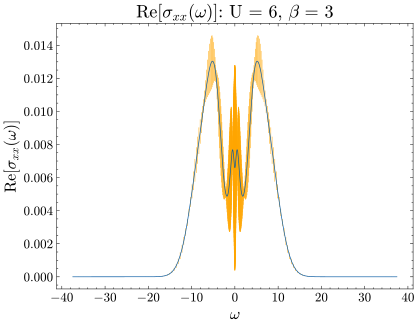

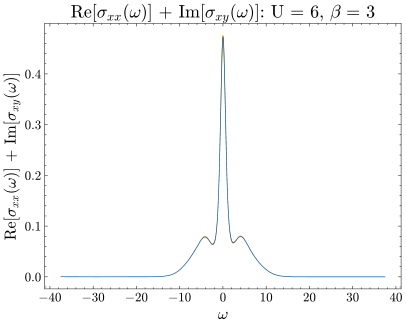

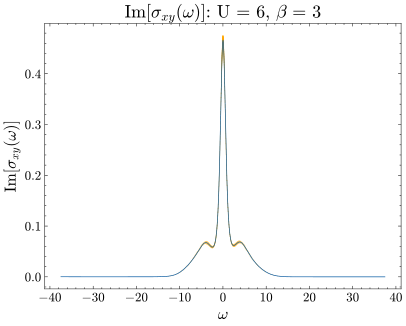

In [11]:
### Plot sigmas so far
plot_sigmas(ws, re_sigmas_xx, U, beta, yerr = re_sigmas_xx_err, ylabel=r'Re[$\sigma_{xx}(\omega)$]')
plot_sigmas(ws, sigmas_sum, U, beta, yerr=sigmas_sum_err, ylabel=r'Re[$\sigma_{xx}(\omega)$] + Im[$\sigma_{xy}(\omega)$]')
plot_sigmas(ws, im_sigmas_xy, U, beta, yerr = im_sigmas_xy_err, ylabel=r'Im[$\sigma_{xy}(\omega)$]')

im_sigmas_xy_asym = 0.5*(im_sigmas_xy - im_sigmas_xy[::-1])   # antisymmetrizing, suspect
im_sigmas_err_asym = 0.5*(im_sigmas_err + im_sigmas_err[::-1])   # antisymmetrizing error (I think this is correct? stupid)
plot_sigmas(ws, im_sigmas_xy_asym, U, beta, yerr = im_sigmas_err_asym, ylabel=r'Im[$\sigma_{xy}(\omega)$]')
plot_sigmas(ws, im_sigmas_xy_asym, U, beta, ylabel=r'Im[$\sigma_{xy}(\omega)$]')

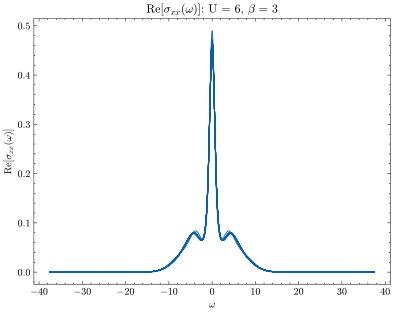

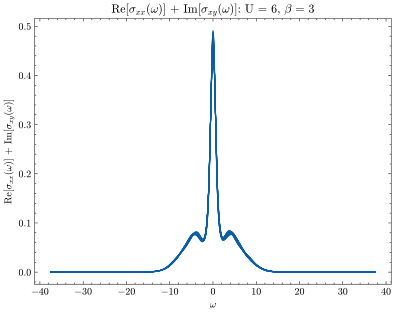

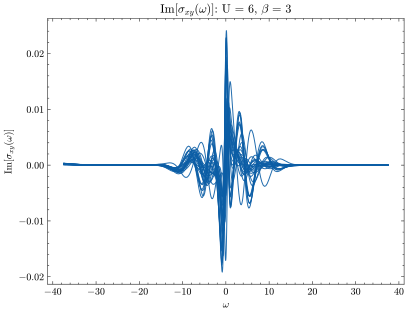

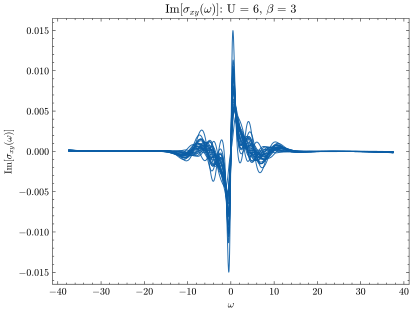

In [50]:
# Alternative view with just all the bootstrapped sigmas plotted on top of each other (check error reasonable)
bs_im_sigmas_xy = bs_sigmas_sum - bs_re_sigmas_xx
bs_im_sigmas_xy_asym =  0.5*(bs_im_sigmas_xy - bs_im_sigmas_xy[:, ::-1]) # antisymmetrize again

plot_sigmas2(ws, bs_re_sigmas_xx, U, beta, ylabel=r'Re[$\sigma_{xx}(\omega)$]')
plot_sigmas2(ws, bs_sigmas_sum, U, beta, ylabel=r'Re[$\sigma_{xx}(\omega)$] + Im[$\sigma_{xy}(\omega)$]')
plot_sigmas2(ws, bs_im_sigmas_xy, U, beta, ylabel=r'Im[$\sigma_{xy}(\omega)$]')

plot_sigmas2(ws, bs_im_sigmas_xy_asym, U, beta, ylabel=r'Im[$\sigma_{xy}(\omega)$]')


DC value: 0.01078570426315173


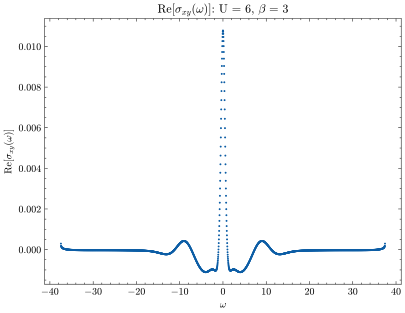

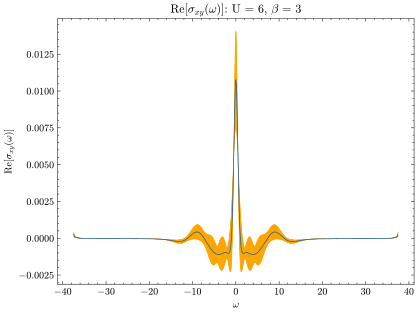

In [53]:
# Get Re[sigma_xy] from Kramers Kronig transform 
# this 1st method doesn't work
# re_sigmas_xy = []
# int_bound = 100
# for w in ws:
#     integral, _ = scipy.integrate.quad(CubicSpline(ws, im_sigmas_xy), -int_bound, int_bound, weight='cauchy', wvar=w)
#     re_sigma_xy = 1/np.pi*integral
#     re_sigmas_xy.append(re_sigma_xy)

### alternate method: use scipy.signal.hilbert()
xs = np.linspace(-w_lim, w_lim, 2500)
fs = CubicSpline(ws, im_sigmas_xy_asym)(xs)
re_sigmas_xy = -np.imag(scipy.signal.hilbert(fs))
# Get error
bs_im_sigmas_xy = bs_sigmas_sum - bs_re_sigmas_xx
bs_im_sigmas_xy_asym =  0.5*(bs_im_sigmas_xy - bs_im_sigmas_xy[:, ::-1]) # antisymmetrize again
bs_re_sigmas_xy = []
for i in range(num_bs):
    fs = CubicSpline(ws, bs_im_sigmas_xy_asym[i])(xs)
    bs_re_sigmas_xy.append(-np.imag(scipy.signal.hilbert(fs)))
re_sigmas_xy_err = np.std(bs_re_sigmas_xy, axis=0)

### Get w-->0: Re[sigma_xy] (DC value)
# re_sigma_xy_dc, _ = scipy.integrate.quad(lambda wp: CubicSpline(ws, im_sigmas_xy)(wp)/np.pi, -int_bound, int_bound, weight='cauchy', wvar=0)
re_sigma_xy_dc = CubicSpline(xs, re_sigmas_xy)(0)
print("DC value:", re_sigma_xy_dc)
# print("DC value2:", re_sigma_xy_dc2)

plot_sigmas(xs, re_sigmas_xy, U, beta, ylabel=r'Re[$\sigma_{xy}(\omega)$]')
plot_sigmas(xs, re_sigmas_xy, U, beta, yerr=re_sigmas_xy_err, ylabel=r'Re[$\sigma_{xy}(\omega)$]')
# plt.savefig('test.png', dpi=250)

In [54]:
### Make a plot for sigma_xy looping through all the temperatures
### does not include error yet

# Choose dir and U to plot from + sigma params
parent_dir = '/oak/stanford/orgs/simes/rebjin/nflux1_n0.9/'
U = 6

num_w = 300
ws, dws = maxent.gen_grid(num_w, -2.1, 2.1, lambda x: 0.4 * np.sinh(2.5 * x))
w_lim = np.max(ws)
xs = np.linspace(-w_lim, w_lim, 2500)
num_bs = 25

# For choice of U, get sigmas(w) for all betas
row_list = []
for path in params_df['path']:
    print(path)
    Ny, Nx, beta, L, tp = util.load_firstfile(
        path, "metadata/Nx", "metadata/Ny", "metadata/beta", "params/L", "metadata/t'"
    )
    T = np.round(1/beta, 2)
    print(f"Params:\nNy = {Ny}, Nx = {Nx}, beta = {np.round(beta, 5)}, L = {L}, tp = {tp}")
    # print(f"Beta = {beta}")

    # Get sigmas_xx
    re_sigmas_xx, _ = get_sigma_xx(path, None, ws, dws)
    # Get errors with bootstrapping
    with HiddenPrints():
        bs_re_sigmas_xx, _ = get_sigma_xx(path, None, ws, dws, bs=num_bs)   # first index bin, second index w
    re_sigmas_xx_err = np.std(bs_re_sigmas_xx, axis=0)

    # Get Im[sigmas_xy]
    sigmas_sum, _ = get_sigma_sum(path, None, ws, dws)
    # Get errors
    with HiddenPrints():
        bs_sigmas_sum, _ = get_sigma_sum(path, None, ws, dws, bs=num_bs)   # first index bin, second index w
    sigmas_sum_err = np.std(bs_sigmas_sum, axis=0)
    im_sigmas_xy = sigmas_sum - re_sigmas_xx    # real
    im_sigmas_xy = 0.5*(im_sigmas_xy - im_sigmas_xy[::-1])    # questionable antisymmetrizing step
    
    # Get Re[sigmas_xy] from Kramers Kronig (Hilbert) transform
    fs = CubicSpline(ws, im_sigmas_xy)(xs)
    re_sigmas_xy = -np.imag(scipy.signal.hilbert(fs))
    # Get errors
    bs_im_sigmas_xy = bs_sigmas_sum - bs_re_sigmas_xx
    bs_im_sigmas_xy_asym =  0.5*(bs_im_sigmas_xy - bs_im_sigmas_xy[:, ::-1]) # questionably antisymmetrize again
    bs_re_sigmas_xy = []
    for i in range(num_bs):
        fs = CubicSpline(ws, bs_im_sigmas_xy_asym[i])(xs)
        bs_re_sigmas_xy.append(-np.imag(scipy.signal.hilbert(fs)))
    re_sigmas_xy_err = np.std(bs_re_sigmas_xy, axis=0)
    
    # Add dict to row_list
    dict = {
        'beta': np.round(beta, 5),
        'U': U, 
        'T': T,
        're_sigmas_xx': re_sigmas_xx,
        're_sigmas_xx_err': re_sigmas_xx_err,
        're_sigmas_xy': re_sigmas_xy,
        're_sigmas_xy_err': re_sigmas_xy_err,
        'im_sigmas_xy': im_sigmas_xy,
        'im_sigmas_xy_err': im_sigmas_xy_err,
        'sigmas_sum': sigmas_sum,
        'sigmas_sum_err': sigmas_sum_err
    }
    row_list.append(dict)
    print('-'*60)
    
# Make DataFrame from list of dicts
df = pd.DataFrame(row_list)
df = df.sort_values(by=['beta'], ascending = False)
df = df.reset_index(drop=True)
print(df)

/oak/stanford/orgs/simes/rebjin/nflux1_n0.9/beta3_U6_mu-1.275/
Params:
Ny = 8, Nx = 8, beta = 3.0, L = 30, tp = 0
alpha=2238.721	chi2/dof=0.628	A.sum()=0.999478
alpha=2238.721	chi2/dof=0.852	A.sum()=0.999754
------------------------------------------------------------
/oak/stanford/orgs/simes/rebjin/nflux1_n0.9/beta2_U6_mu-1.239/
Params:
Ny = 8, Nx = 8, beta = 2.0, L = 20, tp = 0
alpha=1412.538	chi2/dof=1.186	A.sum()=0.999517
alpha=1778.279	chi2/dof=0.857	A.sum()=0.999541
------------------------------------------------------------
/oak/stanford/orgs/simes/rebjin/nflux1_n0.9/beta1.5_U6_mu-1.204/
Params:
Ny = 8, Nx = 8, beta = 1.5, L = 15, tp = 0
alpha=6309.573	chi2/dof=1.766	A.sum()=0.999520
alpha=8912.509	chi2/dof=1.305	A.sum()=0.999632
------------------------------------------------------------
/oak/stanford/orgs/simes/rebjin/nflux1_n0.9/beta1.25_U6_mu-1.167/
Params:
Ny = 8, Nx = 8, beta = 1.25, L = 20, tp = 0
alpha=3981.072	chi2/dof=1.149	A.sum()=0.999938
alpha=4466.836	chi2/dof=0.

In [155]:
def plot_sigmas_T(plot_betas, sigma_name, ylabel, show_err=False, xlim=[], ylim=[]):
        ### df has the data ig
        colors = sns.color_palette('coolwarm', df.shape[0])
        
        fig, ax = plt.subplots(figsize = [6.4, 4.8])
        for beta in plot_betas:
            T = df.loc[df['beta'] == beta, 'T'].item()
            sigmas = df.loc[df['beta'] == beta, sigma_name].item()
            ind = df.loc[df['beta'] == beta].index.tolist()[0]
            # plt.errorbar(ws, sigmas, label = f'T = {T}', color = colors[ind], elinewidth=0.5)
            # plt.scatter(ws, sigmas, label = f'T = {T}', color = colors[ind], s=1)
            if sigma_name == 're_sigmas_xy':
                plot_xs = xs
            else:
                plot_xs = ws
            
            if show_err:
                error_name = sigma_name + '_err'
                errs = df.loc[df['beta'] == beta, error_name].item()
                
                markers, caps, bars = ax.errorbar(plot_xs, sigmas, yerr=errs, fmt='s-', lw=1, ms=0, capsize=0, elinewidth=0.5, color=colors[ind], label = f'T = {T}')
                for bar in bars: bar.set_alpha(0.75)
            else:
                plt.plot(plot_xs, sigmas, label = f'T = {T}', color = colors[ind], lw=1)
        
        plt.legend()
        plt.xlabel(r'$\omega$')
        plt.ylabel(ylabel)
        if xlim: plt.xlim(*xlim)
        if ylim: plt.ylim(*ylim)
        plt.title(f'U = {U}: {ylabel}')
        plt.tight_layout()

def plot_dc_sigmas(sigma_name, ylabel, show_err=False, rho=True):
        # sigmas_dc = []
        # for index, row in df.iterrows():
        #     sigma_dc = CubicSpline(ws, row[sigma_name])(0)
        #     sigmas_dc.append(sigma_dc)
        # sigmas_dc = np.array(sigmas_dc)    ok don't do this I guess lmao
        idx_0 = find_nearest(xs if sigma_name == 're_sigmas_xy' else ws, 0, get_idx = True)  # idx of either ws or xs closest to ws = 0
        sigmas_dc = np.array([sigmas[idx_0] for sigmas in df[sigma_name]])
    
        plt.figure(figsize = [6.4, 4.8])
        if show_err:
            error_name = sigma_name + '_err'
            sigmas_dc_err = np.array([sigmas_err[idx_0] for sigmas_err in df[error_name]])
            rhos_dc_err = (1/sigmas_dc**2)*sigmas_dc_err
            plt.errorbar(df['T'], 1/sigmas_dc if rho else sigmas_dc, yerr=rhos_dc_err if rho else sigmas_dc_err, capsize=1.5)
        else:
            plt.scatter(df['T'], 1/sigmas_dc if rho else sigmas_dc)
            plt.plot(df['T'], 1/sigmas_dc if rho else sigmas_dc)
    
        plt.xlabel('T')
        plt.ylabel(ylabel)
        plt.title(f'U = {U}: {ylabel}')

def plot_dc_sigmas(sigma_name, ylabel, show_err=False, rho=True):
        # sigmas_dc = []
        # for index, row in df.iterrows():
        #     sigma_dc = CubicSpline(ws, row[sigma_name])(0)
        #     sigmas_dc.append(sigma_dc)
        # sigmas_dc = np.array(sigmas_dc)    ok don't do this I guess lmao
        idx_0 = find_nearest(xs if sigma_name == 're_sigmas_xy' else ws, 0, get_idx = True)  # idx of either ws or xs closest to ws = 0
        sigmas_dc = np.array([sigmas[idx_0] for sigmas in df[sigma_name]])
    
        plt.figure(figsize = [6.4, 4.8])
        if show_err:
            error_name = sigma_name + '_err'
            sigmas_dc_err = np.array([sigmas_err[idx_0] for sigmas_err in df[error_name]])
            rhos_dc_err = (1/sigmas_dc**2)*sigmas_dc_err
            plt.errorbar(df['T'], 1/sigmas_dc if rho else sigmas_dc, yerr=rhos_dc_err if rho else sigmas_dc_err, capsize=1.5)
        else:
            plt.scatter(df['T'], 1/sigmas_dc if rho else sigmas_dc)
            plt.plot(df['T'], 1/sigmas_dc if rho else sigmas_dc)
    
        plt.xlabel('T')
        plt.ylabel(ylabel)
        plt.title(f'U = {U}: {ylabel}')

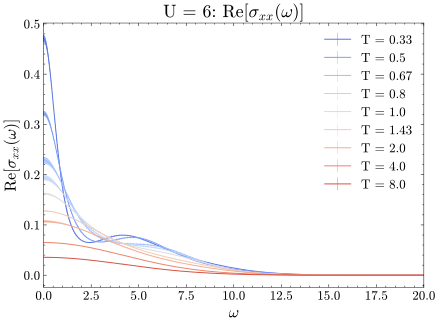

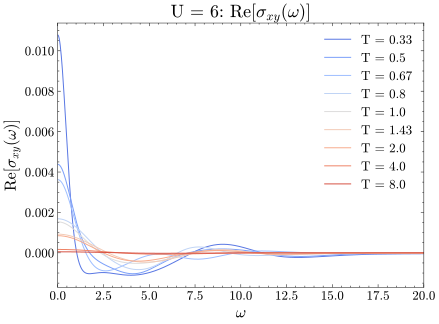

In [159]:
plot_betas = [3, 2, 1.5, 1.25, 1, 0.7, 0.5, 0.25, 0.125]
# plot_sigmas_T(plot_betas, "re_sigmas_xx", ylabel=r'Re[$\sigma_{xx}(\omega)$]', xlim=[0, 20], show_err=True)
# plt.savefig('test.png', dpi=250)
plot_sigmas_T(plot_betas, "re_sigmas_xy", ylabel=r'Re[$\sigma_{xy}(\omega)$]', xlim=[0, 20], show_err=False)
# plt.rcParams.update({'figure.autolayout': True})
plt.savefig('test.png', dpi=250)

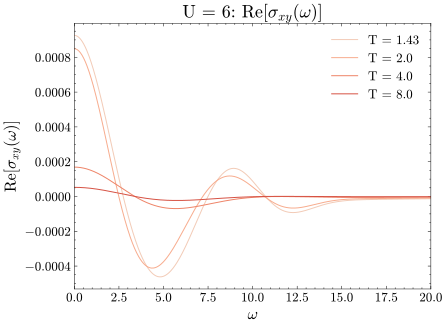

In [135]:
plot_betas = [3, 2, 1.5, 1.25, 1]
plot_betas = [0.7, 0.5, 0.25, 0.125]
plot_sigmas_T(plot_betas, "re_sigmas_xy", ylabel=r'Re[$\sigma_{xy}(\omega)$]', xlim=[0, 20], show_err=False)
plt.savefig('test.png', dpi=250)

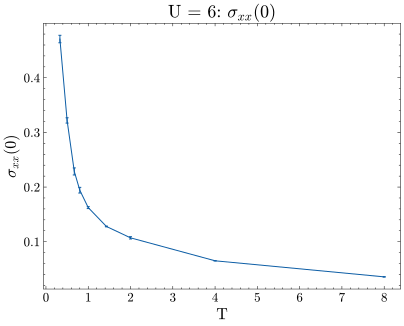

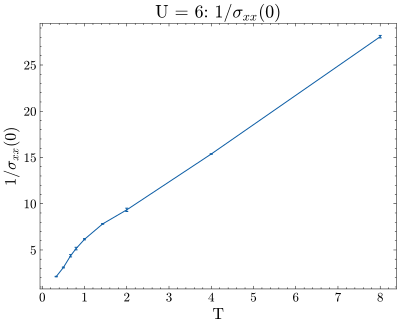

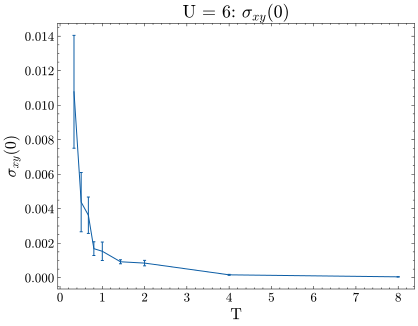

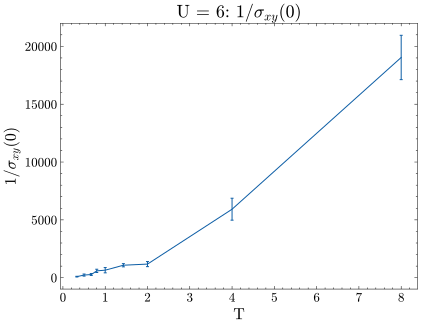

In [137]:
plot_dc_sigmas("re_sigmas_xx", r'$\sigma_{xx}(0)$', rho=False, show_err=True)
plot_dc_sigmas("re_sigmas_xx", r'$1/\sigma_{xx}(0)$', rho=True, show_err=True)
# plt.savefig('test.png', dpi=250)

plot_dc_sigmas("re_sigmas_xy", r'$\sigma_{xy}(0)$', rho=False, show_err=True)
plot_dc_sigmas("re_sigmas_xy", r'$1/\sigma_{xy}(0)$', rho=True, show_err=True)
# plt.savefig('test.png', dpi=250)

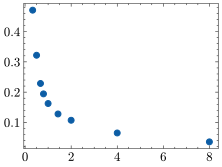

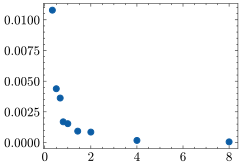

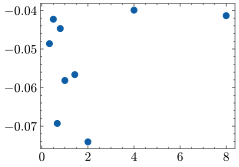

In [152]:
# calculate Hall coefficient (very questionable)
sigma_xx_dc = np.array([CubicSpline(ws, sigmas)(0) for sigmas in df['re_sigmas_xx']])   # vs. T
sigma_xy_dc = np.array([CubicSpline(xs, sigmas)(0) for sigmas in df['re_sigmas_xy']])   # vs. T

plt.figure()
plt.scatter(df['T'], sigma_xx_dc)
plt.figure()
plt.scatter(df['T'], sigma_xy_dc)
a=1
# h=
# B = 1/
R_Hs = -sigma_xy_dc/(sigma_xx_dc**2+sigma_xy_dc**2)
plt.figure()
plt.scatter(df['T'], R_Hs)
# plt.ylim(-80, 1)

In [15]:
# rq relook at what the h5 files look like again, what measurements there are
with h5py.File(path, "r") as f:
    print(list(f.keys()))
    print("Equal time measurements: ", list(f['meas_eqlt'].keys()))
    print("Unequal time measurements: ", list(f['meas_uneqlt'].keys()))

['meas_eqlt', 'meas_uneqlt', 'metadata', 'params', 'state']
Equal time measurements:  ['density', 'double_occ', 'g00', 'n_sample', 'nn', 'pair_sw', 'sign', 'xx', 'zz']
Unequal time measurements:  ['gt0', 'jj', 'jsjs', 'kk', 'ksks', 'n_sample', 'nn', 'pair_bb', 'pair_sw', 'sign', 'xx', 'zz']


# Optimization test

In [ ]:
### 
beta = 1